In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf
from keras.preprocessing.image import load_img

In [2]:
artistName = os.listdir('dataset')
#lists all files and directories in dataset folder

print (artistName)  
print("Artists found: ", len(artistName))

['Beyonce', 'KanyeWest', 'Drake']
Artists found:  3


In [3]:
artists = []

for name in artistName:
 #Stores all images in single list with related artist name
 allArtists = os.listdir('dataset' + '/' +name)
    
 #one by one enters list
 for artistImage in allArtists:
    artists.append((name, str('dataset' + '/' +name) + '/' + artistImage))
    print(artists)

[('Beyonce', 'dataset/Beyonce/b - 4.jpg')]
[('Beyonce', 'dataset/Beyonce/b - 4.jpg'), ('Beyonce', 'dataset/Beyonce/b - 15.jpg')]
[('Beyonce', 'dataset/Beyonce/b - 4.jpg'), ('Beyonce', 'dataset/Beyonce/b - 15.jpg'), ('Beyonce', 'dataset/Beyonce/b - 29.jpg')]
[('Beyonce', 'dataset/Beyonce/b - 4.jpg'), ('Beyonce', 'dataset/Beyonce/b - 15.jpg'), ('Beyonce', 'dataset/Beyonce/b - 29.jpg'), ('Beyonce', 'dataset/Beyonce/b - 28.jpg')]
[('Beyonce', 'dataset/Beyonce/b - 4.jpg'), ('Beyonce', 'dataset/Beyonce/b - 15.jpg'), ('Beyonce', 'dataset/Beyonce/b - 29.jpg'), ('Beyonce', 'dataset/Beyonce/b - 28.jpg'), ('Beyonce', 'dataset/Beyonce/b - 14.jpg')]
[('Beyonce', 'dataset/Beyonce/b - 4.jpg'), ('Beyonce', 'dataset/Beyonce/b - 15.jpg'), ('Beyonce', 'dataset/Beyonce/b - 29.jpg'), ('Beyonce', 'dataset/Beyonce/b - 28.jpg'), ('Beyonce', 'dataset/Beyonce/b - 14.jpg'), ('Beyonce', 'dataset/Beyonce/b - 5.jpg')]
[('Beyonce', 'dataset/Beyonce/b - 4.jpg'), ('Beyonce', 'dataset/Beyonce/b - 15.jpg'), ('Beyonce', 

In [4]:
# data is converted to dataframe, i.e data is put in columns and rows     
artistDF = pd.DataFrame(data=artists, columns=['Artist Name', 'Image'])

print(artistDF.head(10))
print(artistDF.tail(10))

  Artist Name                       Image
0     Beyonce   dataset/Beyonce/b - 4.jpg
1     Beyonce  dataset/Beyonce/b - 15.jpg
2     Beyonce  dataset/Beyonce/b - 29.jpg
3     Beyonce  dataset/Beyonce/b - 28.jpg
4     Beyonce  dataset/Beyonce/b - 14.jpg
5     Beyonce   dataset/Beyonce/b - 5.jpg
6     Beyonce   dataset/Beyonce/b - 7.jpg
7     Beyonce  dataset/Beyonce/b - 16.jpg
8     Beyonce  dataset/Beyonce/b - 17.jpg
9     Beyonce   dataset/Beyonce/b - 6.jpg
    Artist Name                      Image
276       Drake   dataset/Drake/d - 2.jpeg
277       Drake  dataset/Drake/d - 23.jpeg
278       Drake  dataset/Drake/d - 74.jpeg
279       Drake  dataset/Drake/d - 54.jpeg
280       Drake  dataset/Drake/d - 42.jpeg
281       Drake  dataset/Drake/d - 15.jpeg
282       Drake  dataset/Drake/d - 81.jpeg
283       Drake  dataset/Drake/d - 39.jpeg
284       Drake  dataset/Drake/d - 97.jpeg
285       Drake  dataset/Drake/d - 78.jpeg


In [5]:
print("Total number of artist images: ", len(artistDF))

Total number of artist images:  286


In [6]:
artistCount = artistDF['Artist Name'].value_counts()
#value.counts() = amount of artist images in each class

print("artists in each class: ")
print(artistCount)

artists in each class: 
Beyonce      101
Drake        100
KanyeWest     85
Name: Artist Name, dtype: int64


In [7]:
#resizing images
path = 'dataset/' 

imageSize = 255 
#resized images will be stored in empty images list and corresponding labels in labels list
images = []
labels = []

#for loop below goes in to folder one by one, and then below 
for i in artistName:
    dataPath = path + str(i) 
    filenames = [i for i in os.listdir(dataPath) ]
   
    for f in filenames:
        img = cv2.imread(dataPath + '/' + f)  # reads image
        #print(img)  # will get the image as an array
        img = cv2.resize(img, (imageSize, imageSize)) #then image is resized and appended to empty lists
        images.append(img)
        labels.append(i)
        #print(img.shape) #image plus shape
        #print (labels)
        
# Transform the image array to a numpy type

images = np.array(images)

print(images.shape)

(286, 255, 255, 3)


In [8]:
images = images.astype('float32') / 255.0

In [9]:
print(images.shape)

(286, 255, 255, 3)


In [10]:
artistlabel = artistDF['Artist Name'].values
print(artistlabel)

['Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce'
 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce'
 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce'
 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce'
 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce'
 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce'
 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce'
 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce'
 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce'
 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce'
 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce'
 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce'
 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce'
 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce' 'Beyonce'
 'Beyo

In [11]:
artistLabelencoder = LabelEncoder ()
ALE = artistLabelencoder.fit_transform (artistlabel)
print (ALE)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [12]:
images, x = shuffle(images, ALE, random_state=1)

trainX, testX, trainY, testY = train_test_split(images, x, test_size=0.06, random_state=10)

In [13]:
print(trainX.shape)
print(trainY.shape)

(268, 255, 255, 3)
(268,)


In [14]:
print(testX.shape)
print(testY.shape)

(18, 255, 255, 3)
(18,)


In [15]:
# Sequential model using tensorflow keras with layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(255,255,3)),
    
    keras.layers.Dense(300, activation='tanh'),
    keras.layers.Dense(200, activation='tanh'),
   
    keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 195075)            0         
_________________________________________________________________
dense (Dense)                (None, 300)               58522800  
_________________________________________________________________
dense_1 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 603       
Total params: 58,583,603
Trainable params: 58,583,603
Non-trainable params: 0
_________________________________________________________________


In [16]:
#model parameters

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
#fitting training data into model for training + using 5 epochs

MLP = model.fit(trainX,trainY, epochs=10, validation_split=0.1)

Epoch 1/10
8/8 [==============================] - 6s 331ms/step - loss: 1.1072 - accuracy: 0.3568 - val_loss: 1.0822 - val_accuracy: 0.4815
Epoch 2/10
8/8 [==============================] - 2s 284ms/step - loss: 1.0872 - accuracy: 0.3651 - val_loss: 1.0825 - val_accuracy: 0.4444
Epoch 3/10
8/8 [==============================] - 2s 307ms/step - loss: 1.0916 - accuracy: 0.4232 - val_loss: 1.0778 - val_accuracy: 0.3704
Epoch 4/10
8/8 [==============================] - 2s 288ms/step - loss: 1.0847 - accuracy: 0.3610 - val_loss: 1.0910 - val_accuracy: 0.2593
Epoch 5/10
8/8 [==============================] - 3s 329ms/step - loss: 1.0999 - accuracy: 0.3693 - val_loss: 1.0898 - val_accuracy: 0.4074
Epoch 6/10
8/8 [==============================] - 2s 258ms/step - loss: 1.1062 - accuracy: 0.3402 - val_loss: 1.0987 - val_accuracy: 0.1852
Epoch 7/10
8/8 [==============================] - 7s 933ms/step - loss: 1.0996 - accuracy: 0.3154 - val_loss: 1.1042 - val_accuracy: 0.2963
Epoch 8/10
8/8 [====

In [30]:
testPredic = np.argmax(model.predict(testX), axis=-1)

print(testPredic)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


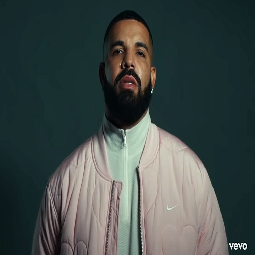

In [31]:
image = load_img('drake - test.jpg', target_size=(255, 255))
image

In [32]:
# image pixels converted to a numpy array
image = np.array(image)
image.shape

# data reshaping for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [33]:
inputPredic = model.predict(image)
print(inputPredic)

[[0.31404528 0.3720002  0.31395453]]


In [34]:
model.evaluate(testX, testY)

1/1 [==============================] - 0s 56ms/step - loss: 1.1019 - accuracy: 0.3333


[1.1018621921539307, 0.3333333432674408]